I have implemented Birch clustering on different dataset sizes to see if birch is efficient for large dataset (10000,100000,1000000) and how it performs in terms of computation time with other clustering algorithms like k means.

In [3]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn import metrics

Generating a dataset with sample size 10000

In [2]:
#generating dataset using make_blobs
x, clusters = make_blobs(n_samples = 10000, n_features = 2, centers = 6, cluster_std = 0.75, random_state = 0)
print(x.shape)

(10000, 2)


Note : For different dataset sizes, the parameter threshold for birch clustering was tuned since it performed bad with some threshold values.

In [37]:
#function to know the computation time of kmeans and birch
def measure_time_spent_kmeans1(x, clusters):
    t0 = time.time()
    kmeans = KMeans(n_clusters=clusters, random_state=10)
    kmeans.fit(x)
    t1 = time.time()
    elapsed_time = round(t1 - t0, 2)
    labels = kmeans.labels_
    silhouette_score = round(metrics.silhouette_score(x, labels), 2)
    return elapsed_time, silhouette_score, labels

def measure_time_spent_birch1(x, clusters):
    t0 = time.time()
    brc = Birch(branching_factor=50, n_clusters=clusters, threshold=1.5)
    brc.fit(x)
    t1 = time.time()
    elapsed_time = round(t1 - t0, 2)
    labels = brc.labels_
    silhouette_score = round(metrics.silhouette_score(x, labels), 2)
    return elapsed_time, silhouette_score, labels

In [38]:
kmeans_time, kmeans_silhouette, kmeans_labels = measure_time_spent_kmeans1(x, 6)
print(f"KMeans - Time spent: {kmeans_time} seconds, Silhouette Score: {kmeans_silhouette}")
birch_time, birch_silhouette, birch_labels = measure_time_spent_birch1(x,6 )
print(f"BIRCH - Time spent: {birch_time} seconds, Silhouette Score: {birch_silhouette}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans - Time spent: 1.03 seconds, Silhouette Score: 0.62
BIRCH - Time spent: 0.13 seconds, Silhouette Score: 0.6


A score of more than 0.5 indicates a high-quality cluster, whereas a score of less than 0.5 indicates a low-quality cluster.

In [16]:
# BIRCH Model algorithm
model = Birch(branching_factor = 50, n_clusters = None, threshold = 2.5)

# Fitting the training data
model.fit(x)

# Predict the same data
pred = model.predict(x)

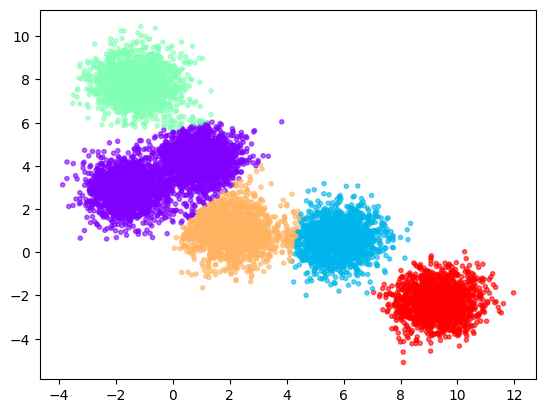

In [17]:
# Plot the clusters formed by KMeans
plt.scatter(x[:, 0], x[:, 1], c= pred, cmap='rainbow', alpha = 0.6, s= 9)

Generating a Dataset with sample size 100000

In [9]:
a, clusters = make_blobs(n_samples=100000,
                         n_features=2,
                         centers=9,
                         cluster_std=1.5,
                         random_state=0)
a.shape

(100000, 2)

In [10]:
# Function to measure time spent by KMeans
def measure_time_spent_kmeans(a, clusters):
    t0 = time.time()
    kmeans = KMeans(n_clusters=clusters, random_state=10)
    kmeans.fit(a)
    t1 = time.time()
    elapsed_time = round(t1 - t0, 2)
    labels = kmeans.labels_
    return elapsed_time, labels

# Function to measure time spent by BIRCH
def measure_time_spent_birch(a, clusters):
    t0 = time.time()
    brc = Birch(branching_factor=50, n_clusters=clusters, threshold=2)
    brc.fit(a)
    t1 = time.time()
    elapsed_time = round(t1 - t0, 2)
    labels = brc.labels_
    return elapsed_time, labels

In [20]:
kmeans_time, kmeans_silhouette, kmeans_labels = measure_time_spent_kmeans(a, 9)
print(f"KMeans - Time spent: {kmeans_time} seconds, Silhouette Score: {kmeans_silhouette}")

# Measure metrics for BIRCH
birch_time, birch_silhouette, birch_labels = measure_time_spent_birch(a,9)
print(f"BIRCH - Time spent: {birch_time} seconds, Silhouette Score: {birch_silhouette}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans - Time spent: 2.04 seconds, Silhouette Score: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(


BIRCH - Time spent: 1.52 seconds, Silhouette Score: 0.43


Generating a Dataset with sample size 1000000

In [4]:
X, clusters = make_blobs(n_samples=1000000,
                         n_features=2,
                         centers=12,
                         cluster_std= 1.5,
                         random_state=0)
X.shape

(1000000, 2)

In [5]:
# Function to measure time spent by KMeans
def measure_time_spent_kmeans2(X, clusters):
    t0 = time.time()
    kmeans = KMeans(n_clusters=clusters, random_state=10)
    kmeans.fit(X)
    t1 = time.time()
    elapsed_time = round(t1 - t0, 2)
    labels = kmeans.labels_
    return elapsed_time, labels

# Function to measure time spent by BIRCH
def measure_time_spent_birch2(X, clusters):
    t0 = time.time()
    brc = Birch(branching_factor=50, n_clusters=clusters, threshold=2.5)
    brc.fit(X)
    t1 = time.time()
    elapsed_time = round(t1 - t0, 2)
    labels = brc.labels_
    return elapsed_time, labels

In [6]:
print('K-Means:', measure_time_spent_kmeans2(X,12))
print('BIRCH:', measure_time_spent_birch2(X,12))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means: (46.03, array([1, 3, 9, ..., 8, 1, 4], dtype=int32))
BIRCH: (15.83, array([3, 1, 2, ..., 0, 3, 7]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (9) by BIRCH is less than (12). Decrease the threshold.
  warnings.warn(


I could not able to calculate the silhouette score for this size of dataset because i dont have the sufficient compuational resources and it was taking so much time

Graph to plot and compare the computation time of K means and Birch clustering

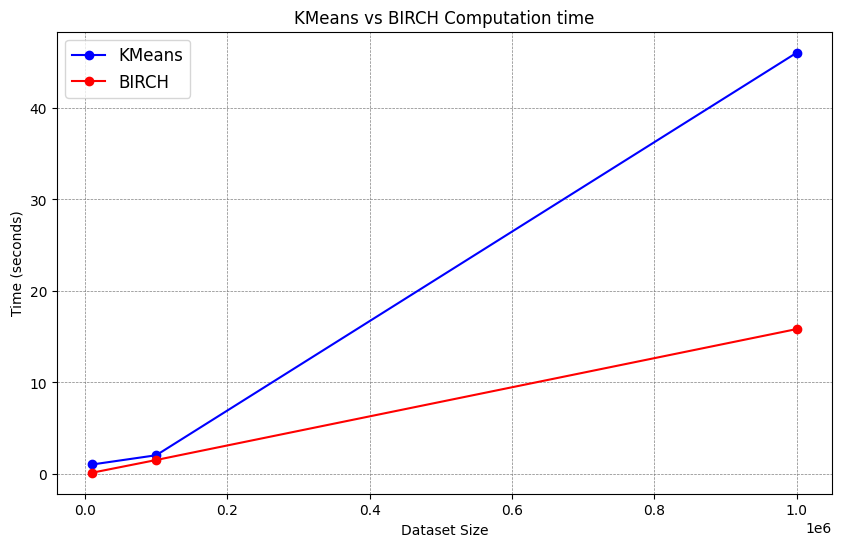

In [7]:
dataset_sizes = [10000, 100000, 1000000]
kmeans_times = [1.03, 2.04, 46.03]
birch_times = [0.13, 1.52, 15.83]


plt.figure(figsize=(10, 6))

# Plot KMeans time complexity
plt.plot(dataset_sizes, kmeans_times, marker='o', linestyle='-', color='b', label='KMeans')

# Plot BIRCH time complexity
plt.plot(dataset_sizes, birch_times, marker='o', linestyle='-', color='r', label='BIRCH')


plt.legend(fontsize=12, loc='upper left')
plt.title('KMeans vs BIRCH Computation time')
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')